In [100]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy import fromstring, int16, frombuffer
import soundfile as sf
import wave
import struct

In [2]:
h_n = pd.read_csv('hpf_60hz.csv', header=None)

In [3]:
h_n

,0,1
0,8.162359e-21,NaN
1,-2.097374e-09,NaN
2,-8.420160e-09,NaN
3,-1.901488e-08,NaN
4,-3.392878e-08,NaN
5,-5.320983e-08,NaN
6,-7.690672e-08,NaN
7,-1.050689e-07,NaN
8,-1.377466e-07,NaN
9,-1.749908e-07,NaN


In [4]:
h_n=h_n[0]

In [5]:
h_n

0       8.162359e-21
1      -2.097374e-09
2      -8.420160e-09
3      -1.901488e-08
4      -3.392878e-08
5      -5.320983e-08
6      -7.690672e-08
7      -1.050689e-07
8      -1.377466e-07
9      -1.749908e-07
10     -2.168532e-07
11     -2.633865e-07
12     -3.146439e-07
13     -3.706796e-07
14     -4.315485e-07
15     -4.973066e-07
16     -5.680103e-07
17     -6.437173e-07
18     -7.244858e-07
19     -8.103751e-07
20     -9.014451e-07
21     -9.977569e-07
22     -1.099372e-06
23     -1.206354e-06
24     -1.318765e-06
25     -1.436671e-06
26     -1.560137e-06
27     -1.689229e-06
28     -1.824015e-06
29     -1.964562e-06
            ...     
971    -1.964562e-06
972    -1.824015e-06
973    -1.689229e-06
974    -1.560137e-06
975    -1.436671e-06
976    -1.318765e-06
977    -1.206354e-06
978    -1.099372e-06
979    -9.977569e-07
980    -9.014451e-07
981    -8.103751e-07
982    -7.244858e-07
983    -6.437173e-07
984    -5.680103e-07
985    -4.973066e-07
986    -4.315485e-07
987    -3.706

In [6]:
h_n=h_n.T

In [7]:
h_n

0       8.162359e-21
1      -2.097374e-09
2      -8.420160e-09
3      -1.901488e-08
4      -3.392878e-08
5      -5.320983e-08
6      -7.690672e-08
7      -1.050689e-07
8      -1.377466e-07
9      -1.749908e-07
10     -2.168532e-07
11     -2.633865e-07
12     -3.146439e-07
13     -3.706796e-07
14     -4.315485e-07
15     -4.973066e-07
16     -5.680103e-07
17     -6.437173e-07
18     -7.244858e-07
19     -8.103751e-07
20     -9.014451e-07
21     -9.977569e-07
22     -1.099372e-06
23     -1.206354e-06
24     -1.318765e-06
25     -1.436671e-06
26     -1.560137e-06
27     -1.689229e-06
28     -1.824015e-06
29     -1.964562e-06
            ...     
971    -1.964562e-06
972    -1.824015e-06
973    -1.689229e-06
974    -1.560137e-06
975    -1.436671e-06
976    -1.318765e-06
977    -1.206354e-06
978    -1.099372e-06
979    -9.977569e-07
980    -9.014451e-07
981    -8.103751e-07
982    -7.244858e-07
983    -6.437173e-07
984    -5.680103e-07
985    -4.973066e-07
986    -4.315485e-07
987    -3.706

In [8]:
h_n_arr=np.array(h_n)

In [9]:
h_n_arr


array([ 8.16235937e-21, -2.09737398e-09, -8.42015974e-09, ...,
       -8.42015974e-09, -2.09737398e-09,  8.16235937e-21])

In [10]:
wavf = 'test_2_48000.wav'
wr = wave.open(wavf, 'r')

# waveファイルが持つ性質を取得
ch = wr.getnchannels()
width = wr.getsampwidth()
fr = wr.getframerate()
fn = wr.getnframes()

In [11]:
data=wr.readframes(wr.getnframes())

In [12]:
wr.close()

In [13]:
X = frombuffer(data, dtype=int16)

In [14]:
X

array([  3765, -10078,  -4450, ...,  -6859,  -7799,  -8158], dtype=int16)

In [15]:
y = np.convolve(X, h_n_arr, mode="full")

In [16]:
y

array([ 3.07312830e-17, -7.89661302e-06, -1.05645665e-05, ...,
        8.50490828e-05,  1.71103769e-05, -6.65885277e-17])

In [17]:
outf ="test_hpf_out.wav"


In [18]:
# 書き出し
ww = wave.open(outf, 'w')
ww.setnchannels(ch)
ww.setsampwidth(width)
ww.setframerate(fr)
ww.writeframes(y)
ww.close()

In [47]:
#delta fanction
deltas = np.zeros(1000, dtype=int16)

In [48]:
deltas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
deltas[0] = 1

In [50]:
deltas

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
#delta convolution
H = np.convolve(deltas, h_n_arr, mode="full")

In [52]:
H

array([ 8.16235937e-21, -2.09737398e-09, -8.42015974e-09, ...,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [53]:
H.shape

(2000,)

In [54]:
h_n_arr * h_n_arr

array([6.66241104e-41, 4.39897759e-18, 7.08990901e-17, ...,
       7.08990901e-17, 4.39897759e-18, 6.66241104e-41])

In [55]:
h_n_arr.max()

0.99875

In [56]:
h_n_arr_int = h_n_arr/h_n_arr.max() * 32767

In [57]:
i = 0
for element in h_n_arr_int:
    h_n_arr_int[i] = int(element)
    i += 1

In [67]:
print(h_n_arr_int)
h_n_arr_int=h_n_arr_int.astype(np.int16)
print(h_n_arr_int)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [74]:
for element in h_n_arr_int:
    print(element)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-5
-5
-5
-5
-5
-5
-5
-5
-5
-5
-5
-5
-6
-6
-6
-6
-6
-6
-6
-6
-6
-6
-6
-6
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-8
-8
-8
-8
-8
-8
-8
-8
-8
-9
-9
-9
-9
-9
-9
-9
-9
-9
-10
-10
-10
-10
-10
-10
-10
-10
-10
-11
-11
-11
-11
-11
-11
-11
-11
-12
-12
-12
-12
-12
-12
-12
-12
-13
-13
-13
-13
-13
-13
-13
-14
-14
-14
-14
-14
-14
-14
-15
-15
-15
-15
-15
-15
-15
-16
-16
-16
-16
-16
-16
-16
-17
-17
-17
-17
-17
-17
-17
-18
-18
-18
-18
-18
-18
-18
-19
-19
-19
-19
-19
-19
-20
-20
-20
-20
-20
-20
-20
-21
-21
-21
-21
-21
-21
-22
-22
-22
-22
-22
-22
-23
-23
-23
-23
-23
-23
-2

In [75]:
#delta convolution
H = np.convolve(deltas, h_n_arr_int, mode="full")

In [76]:
H

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [77]:
for element in H:
    print(element)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-5
-5
-5
-5
-5
-5
-5
-5
-5
-5
-5
-5
-6
-6
-6
-6
-6
-6
-6
-6
-6
-6
-6
-6
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-8
-8
-8
-8
-8
-8
-8
-8
-8
-9
-9
-9
-9
-9
-9
-9
-9
-9
-10
-10
-10
-10
-10
-10
-10
-10
-10
-11
-11
-11
-11
-11
-11
-11
-11
-12
-12
-12
-12
-12
-12
-12
-12
-13
-13
-13
-13
-13
-13
-13
-14
-14
-14
-14
-14
-14
-14
-15
-15
-15
-15
-15
-15
-15
-16
-16
-16
-16
-16
-16
-16
-17
-17
-17
-17
-17
-17
-17
-18
-18
-18
-18
-18
-18
-18
-19
-19
-19
-19
-19
-19
-20
-20
-20
-20
-20
-20
-20
-21
-21
-21
-21
-21
-21
-22
-22
-22
-22
-22
-22
-23
-23
-23
-23
-23
-23
-2

In [78]:
wavf = 'test_2_48000.wav'
wr = wave.open(wavf, 'r')

# waveファイルが持つ性質を取得
ch = wr.getnchannels()
width = wr.getsampwidth()
fr = wr.getframerate()
fn = wr.getnframes()
data=wr.readframes(wr.getnframes())
wr.close()

In [79]:
X = frombuffer(data, dtype=int16)

In [80]:
X

array([  3765, -10078,  -4450, ...,  -6859,  -7799,  -8158], dtype=int16)

In [81]:
X.max()

32767

In [83]:
#デルタ関数の畳み込み
y_delta = np.convolve(X, deltas, mode="full")

outf ="test_delta_out.wav"
# 書き出し
ww = wave.open(outf, 'w')
ww.setnchannels(ch)
ww.setsampwidth(width)
ww.setframerate(fr)
ww.writeframes(y_delta)
ww.close()

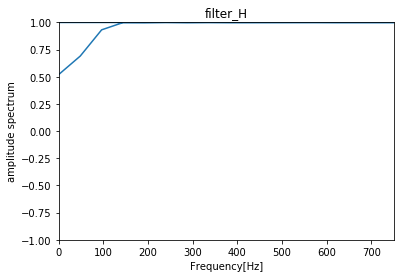

In [103]:
count=1
size = 1001
#start = 0
#end = 1000


#st = 10000   # サンプリングする開始位置

#fs = 44100 #サンプリングレート
fs=48000
d = 1.0 / fs #サンプリングレートの逆数
freqList = np.fft.fftfreq(size, d)

for i in range(count):
    #n = random.randint(start,end)

    data = np.fft.fft(h_n_arr_int)
    data = data / max(abs(data)) # 0~1正規化
    plt.plot(freqList,abs(data))

#plt.axis([0,fs/16,0,1]) #第二引数でグラフのy軸方向の範囲指定
plt.axis([0,fs/64,-1,1]) #第二引数でグラフのy軸方向の範囲指定
plt.title("filter_H")
plt.xlabel("Frequency[Hz]")
plt.ylabel("amplitude spectrum")
plt.show()



ValueError: x and y must have same first dimension, but have shapes (50,) and (1001,)

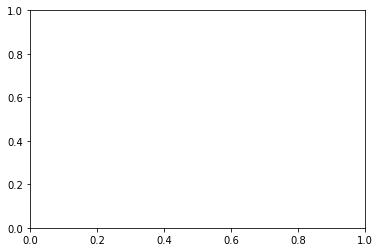

In [104]:
count=1
size = 1001
#start = 0
#end = 1000


#st = 10000   # サンプリングする開始位置

#fs = 44100 #サンプリングレート
fs=48000
d = 1.0 / fs #サンプリングレートの逆数
freqList = np.fft.fftfreq(size, d)

for t in range(count):
    #n = random.randint(start,end)

    #data = np.fft.fft(h_n_arr_int)
    data = h_n_arr_int
    data = data / max(abs(data)) # 0~1正規化
    plt.plot(np.linspace(0,len(data)),data)

#plt.axis([0,fs/16,0,1]) #第二引数でグラフのy軸方向の範囲指定
plt.axis([0,len(data),0,1]) #第二引数でグラフのy軸方向の範囲指定
plt.title("filter_H")
plt.xlabel("Time[s]")
plt.ylabel("amplitude spectrum")
plt.show()




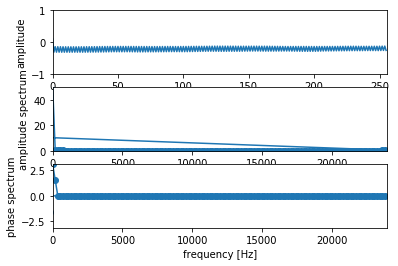

In [94]:
#coding:utf-8
import wave
import numpy as np
import scipy.fftpack
from pylab import *

if __name__ == "__main__" :
    data_name="test_2_48000.wav"
    
    wf = wave.open(data_name , "r" )
    fs = wf.getframerate()  # サンプリング周波数
    x = wf.readframes(wf.getnframes())
    x = frombuffer(x, dtype= "int16") / 32768.0  # -1 - +1に正規化
    wf.close()

    start = 0  # サンプリングする開始位置
    N = 256    # FFTのサンプル数

    X = np.fft.fft(x[start:start+N])  # FFT
#    X = scipy.fftpack.fft(x[start:start+N])         # scipy版

    freqList = np.fft.fftfreq(N, d=1.0/fs)  # 周波数軸の値を計算
#    freqList = scipy.fftpack.fftfreq(N, d=1.0/ fs)  # scipy版

    amplitudeSpectrum = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in X]  # 振幅スペクトル
    phaseSpectrum = [np.arctan2(int(c.imag), int(c.real)) for c in X]    # 位相スペクトル

    # 波形を描画
    subplot(311)  # 3行1列のグラフの1番目の位置にプロット
    plot(range(start, start+N), x[start:start+N])
    axis([start, start+N, -1.0, 1.0])
    xlabel("time [sample]")
    ylabel("amplitude")

    # 振幅スペクトルを描画
    subplot(312)
    plot(freqList, amplitudeSpectrum, marker= 'o', linestyle='-')
    axis([0, fs/2, 0, 50])
    xlabel("frequency [Hz]")
    ylabel("amplitude spectrum")

    # 位相スペクトルを描画
    subplot(313)
    plot(freqList, phaseSpectrum, marker= 'o', linestyle='-')
    axis([0, fs/2, -np.pi, np.pi])
    xlabel("frequency [Hz]")
    ylabel("phase spectrum")

    show()